# 07_03: Name Popularity

In [1]:
import math
import collections

import numpy as np
import pandas as pd
import matplotlib.pyplot as pp

%matplotlib inline

In [2]:
pd.options.display.max_rows = 6

In [3]:
allyears = pd.read_csv('allyears.csv.gz')

In [4]:
allyears

,name,sex,number,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
...,...,...,...,...
1957043,Zyrie,M,5,2018
1957044,Zyron,M,5,2018
1957045,Zzyzx,M,5,2018


In [5]:
allyears_indexed = allyears.set_index(['sex','name','year']).sort_index()

In [13]:
allyears_indexed.loc[('F','Mary')]

,number
year,
1880,7065
1881,6919
1882,8148
...,...
2016,2508
2017,2402
2018,2327


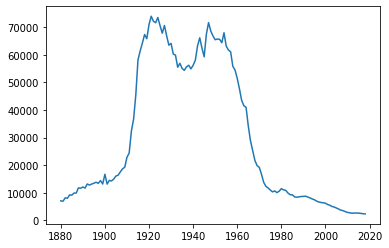

In [31]:
pp.plot(allyears_indexed.loc[('F','Mary')])

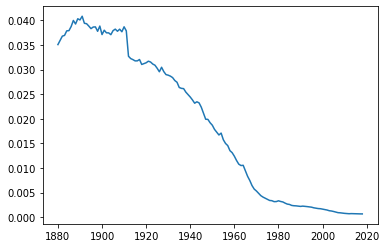

In [33]:
# normalize F/Mary time series by the total number of births each year
pp.plot(allyears_indexed.loc[('F','Mary')] / allyears.groupby('year').sum())

In [34]:
# plot number of sex/name babies as a function of year

def plotname(sex, name):
    data = allyears_indexed.loc[(sex,name)]
    
    pp.plot(data.index, data.values, label=name)
    pp.axis(xmin=1880, xmax=2018)

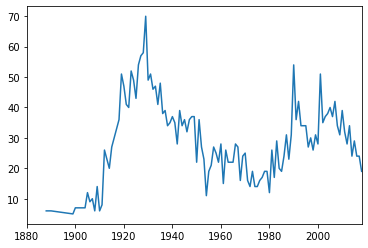

In [35]:
plotname('M', 'Johny')

In [36]:
# combine several "plotname()" plots for given sex and list of names

def comparenames(sex, names):
    pp.figure(figsize=(12,2.5))

    for name in names:
        plotname(sex, name)

    pp.legend()

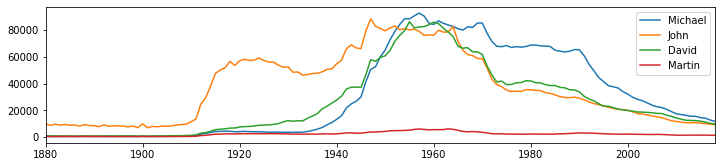

In [37]:
comparenames('M', ['Michael','John','David','Martin'])

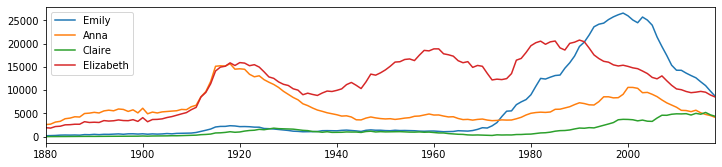

In [38]:
comparenames('F', ['Emily','Anna','Claire','Elizabeth'])

In [39]:
claires = ['Claire','Clare','Clara','Chiara','Ciara']

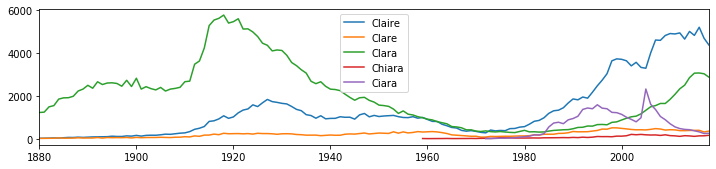

In [40]:
comparenames('F', claires)

In [42]:
allyears_indexed.loc[('F',claires),:]

number
sex name   year        
F   Chiara 1959       9
           1960       5
           1962       8
...                 ...
    Clare  2016     394
           2017     315
           2018     357

[522 rows x 1 columns]

In [48]:
# "pivot" the third level of the multiindex (years) to create a row of columns;
# result is names (rows) x years (columns)
allyears_indexed.loc[('F',claires),:].unstack(level=2)

number                                                          \
year          1880    1881    1882    1883    1884    1885    1886    1887   
sex name                                                                     
F   Chiara     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
    Ciara      NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
    Claire    21.0    23.0    30.0    38.0    33.0    49.0    61.0    58.0   
    Clara   1226.0  1242.0  1490.0  1548.0  1852.0  1910.0  1916.0  1984.0   
    Clare     15.0    20.0    21.0    22.0    38.0    27.0    26.0    31.0   

                            ...                                          \
year          1888    1889  ...    2009    2010    2011    2012    2013   
sex name                    ...                                           
F   Chiara     NaN     NaN  ...   183.0   145.0   134.0   111.0   142.0   
    Ciara      NaN     NaN  ...   888.0   699.0   554.0   475.0   436.0   
    Claire    73.0    62.0  ...  4824.0  4915.0  4896.0  4944.0  4656.0   
    Clara   2230.0  2319.0  ...  1647.0  1840.0  2074.0  2333.0  2504.0   
    Clare     43.0    34.0  ...   405.0   421.0   414.0   379.0   377.0   

                                                    
year          2014    2015    2016    2017    2018  
sex name                                            
F   Chiara   131.0   111.0   134.0   137.0   160.0  
    Ciara    422.0   372.0   321.0   243.0   256.0  
    Claire  5014.0  4829.0  5209.0  4693.0  4379.0  
    Clara   2854.0  3064.0  3072.0  3035.0  2877.0  
    Clare    386.0   389.0   394.0   315.0   357.0  

[5 rows x 139 columns]

In [49]:
# "pivot" the third level of the multiindex (names) to create a row of columns
allyears_indexed.loc[('F',claires),:].unstack(level=1)

number                              
name     Chiara  Ciara  Claire   Clara  Clare
sex year                                     
F   1880    NaN    NaN    21.0  1226.0   15.0
    1881    NaN    NaN    23.0  1242.0   20.0
    1882    NaN    NaN    30.0  1490.0   21.0
...         ...    ...     ...     ...    ...
    2016  134.0  321.0  5209.0  3072.0  394.0
    2017  137.0  243.0  4693.0  3035.0  315.0
    2018  160.0  256.0  4379.0  2877.0  357.0

[139 rows x 5 columns]

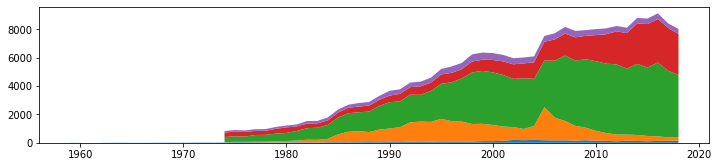

In [50]:
# make a stacked (cumulative) area plot using names x years table 

pp.figure(figsize=(12,2.5))
pp.stackplot(range(1880,2019),
             allyears_indexed.loc[('F',claires),:].unstack(level=2));

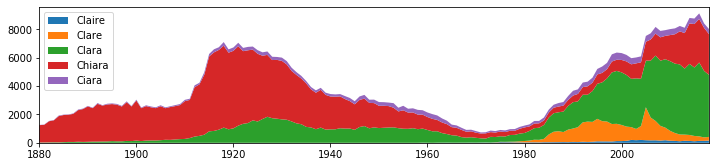

In [51]:
# fix stacked plot by filling NaNs with zeros, adding labels, setting axis range

pp.figure(figsize=(12,2.5))
pp.stackplot(range(1880,2019),
             allyears_indexed.loc[('F',claires),:].unstack(level=2).fillna(0),
             labels=claires);

pp.legend(loc='upper left')
pp.axis(xmin=1880, xmax=2018);